In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from IPython.display import Math
%matplotlib inline

# ЦПТ своими руками для распределение Симпсона

## Введение

Будем исследовать треуголное распределение (распределение Симпсона) с матожиданием в точке 0.3


In [2]:
mu = 0.3
triang_rv = sts.triang(mu)

Для этого распределения 

$\mathbb{D}[X] = \frac{a^2 + b^2 + c^2 - ab - ac - bc}{18}$

$\mathbb{E}[X] = \frac{a + b + c}{3}$

У нас $a = 0$, $b = 1$, $c=0,3$

Сразу вычислим дисперсию и матожидание:

In [3]:
def triangle_d(a, b, c):
    return (a * a + b * b + c * c - a * b - a * c - b * c) / 18

d = triangle_d(0, 1, mu)
display(Math('$\mathbb{D}[X] = %f$' % d))

def triangle_ev(a, b, c):
    return (a + b + c) / 3

ev = triangle_ev(0, 1, mu)

display(Math('$\mathbb{E}[X] = %f$' % ev))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Сделаем выборку из 10000 элементов

In [4]:
sample = triang_rv.rvs(size=10000)

И построим гистограму плотности выборки и график плотности распределения

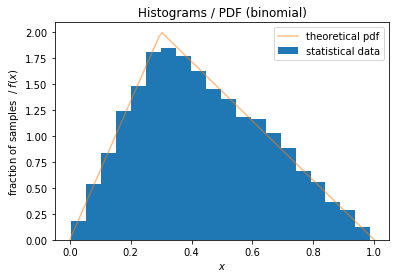

In [5]:
fig, ax = plt.subplots(1, 1)
plt.title('Histograms / PDF (binomial)')
plt.ylabel('fraction of samples  / $f(x)$')
plt.xlabel('$x$')
ax.hist(sample, bins=20, density=True, label='statistical data')
x = np.linspace(0,1,100)
pdf = triang_rv.pdf(x)
ax.plot(x, pdf, label='theoretical pdf', alpha=0.5)
ax.legend();

## Приготовления

Сделаем вспомогательную функцию-генератор `length` средних от выборок объёмом `sample_size`:

In [6]:
def mean_sample_generator(sample_size, length):
    return (triang_rv.rvs(size=sample_size).mean() for i in range(length))

Для удобства создадим функцию, которая будет исследовать выборку размером `sample_size`:

In [7]:
def explore_sample_size(sample_size):
    # сгегерируем выборку средних значений выборки объёма sample_size
    sampled_means = np.fromiter(mean_sample_generator(sample_size, 1000), dtype=float)
    
    # построим гистограмму плотности распределения этой выборки
    plt.title('Sampled means (%s samples)' % sample_size)
    plt.ylabel('fraction of samples / $f(x)$')
    plt.xlabel('$x$')
    plt.hist(sampled_means, bins=20, density=True, label='experimental')
    
    # посчитаем теоритические параметры дисперсии и стандарного отклонения
    theoretical_disp = d / sample_size
    
    display(
        Math(
            '$\mathbb{D}[\overline{X}_n - \mu] ~ {\mathbb{E}[X]} / {n} = '
            '%f / %f = %f$' % (ev, sample_size, theoretical_disp)
        )
    )

    theoretical_sigma = np.sqrt(theoretical_disp)
    display(Math('$\sigma = %f$' % theoretical_sigma))
    
    # создадим генератор нормального распределения
    theoretical_rv = sts.norm(ev, theoretical_sigma)
    
    # построим график теоритической плотности вероятности
    x = np.linspace(0,1,100)
    plt.plot(x, theoretical_rv.pdf(x), label='theoretical pdf, ')
    plt.legend()

## Исследования

Исследуем на объеме выборки 3:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

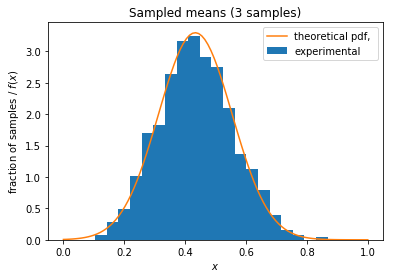

In [8]:
explore_sample_size(3)

Исследуем на объеме выборки 5:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

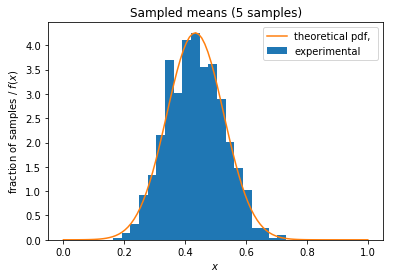

In [9]:
explore_sample_size(5)

Исследуем на объеме выборки 10:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

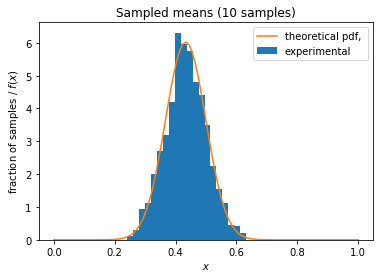

In [10]:
explore_sample_size(10)

Исследуем на объеме выборки 50:

<IPython.core.display.Math object>

<IPython.core.display.Math object>

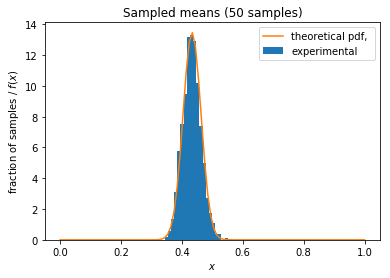

In [11]:
explore_sample_size(50)

## Выводы

